In [42]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error


In [43]:
df=pd.read_csv(r'cereal.csv')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [45]:
print("\nNull values in each column:\n", df.isnull().sum())


Null values in each column:
 name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [46]:
if df.isnull().sum().sum() > 0:
  # Display heatmap of missing values before imputation
  plt.figure(figsize=(10, 8))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Missing Values Heatmap (Before)')
  plt.show()

  # Impute missing values with the mean
  imputer = SimpleImputer(strategy='mean')
  df = imputer.fit_transform(df)  # Create a transformed DataFrame

  print("\nNull values after imputation:\n", df.isnull().sum())

  # Display heatmap of missing values after imputation
  plt.figure(figsize=(10, 8))
  sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
  plt.title('Missing Values Heatmap (After)')
  plt.show()


In [47]:

# Remove non-numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])


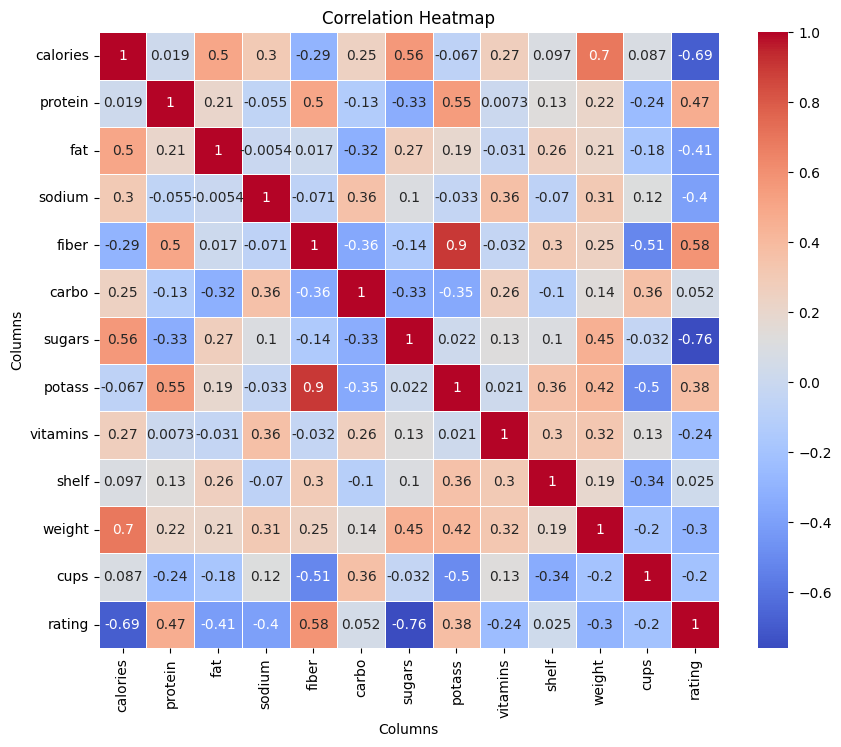

In [48]:

# Display a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()


In [58]:
# Convert 'type' to binary
df['type'] = (df['type'] == 'C').astype(int)



In [59]:

# Display unique values of 'mfr'
print("\nUnique values in 'mfr':\n", df['mfr'].unique())



Unique values in 'mfr':
 ['N' 'Q' 'K' 'R' 'G' 'P' 'A']


In [60]:
# Replace -1 with NaN and fill with mean values for specific columns
df = df.replace(-1, np.NaN)
for col in ['carbo', 'sugars', 'potass']:
    df[col] = df[col].fillna(df[col].mean())


In [61]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
2,All-Bran,K,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
4,Almond Delight,R,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,3,1.0,0.75,34.384843


In [62]:
df.drop('name',axis=1,inplace=True)

In [63]:
# Convert 'mfr' to dummy variables
dummy = pd.get_dummies(df['mfr'], dtype=int)
df = pd.concat([df, dummy], axis=1)
df.drop('mfr', axis=1, inplace=True)


In [64]:

# Separate features and target variable
y = df['rating']
X = df.drop('rating', axis=1)


In [65]:
# Standardize the features
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


In [66]:
df

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,weight,cups,rating,A,G,K,N,P,Q,R
0,0,70,4,1,130,10.0,5.0,6.0,280.000000,25,...,1.0,0.33,68.402973,0,0,0,1,0,0,0
1,0,120,3,5,15,2.0,8.0,8.0,135.000000,0,...,1.0,1.00,33.983679,0,0,0,0,0,1,0
2,0,70,4,1,260,9.0,7.0,5.0,320.000000,25,...,1.0,0.33,59.425505,0,0,1,0,0,0,0
3,0,50,4,0,140,14.0,8.0,0.0,330.000000,25,...,1.0,0.50,93.704912,0,0,1,0,0,0,0
4,0,110,2,2,200,1.0,14.0,8.0,98.666667,25,...,1.0,0.75,34.384843,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0,110,2,1,250,0.0,21.0,3.0,60.000000,25,...,1.0,0.75,39.106174,0,1,0,0,0,0,0
73,0,110,1,1,140,0.0,13.0,12.0,25.000000,25,...,1.0,1.00,27.753301,0,1,0,0,0,0,0
74,0,100,3,1,230,3.0,17.0,3.0,115.000000,25,...,1.0,0.67,49.787445,0,0,0,0,0,0,1
75,0,100,3,1,200,3.0,17.0,3.0,110.000000,25,...,1.0,1.00,51.592193,0,1,0,0,0,0,0


In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Train linear regression models
lr = LinearRegression()
r = Ridge(alpha=1.5)
l = Lasso(alpha=0.001)
lr.fit(X_train, y_train)
r.fit(X_train, y_train)
l.fit(X_train, y_train)

Lasso(alpha=0.001)

In [69]:
# Train decision tree regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
# Train random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
lr.score(X_test,y_test)

0.9948099263626617

In [72]:
r.score(X_test,y_test)

0.9968341131106053

In [73]:
l.score(X_test,y_test)

0.994887706176262

In [74]:
dt.score(X_test,y_test)

0.6521509401660199

In [75]:
rf.score(X_test,y_test)

0.8024268404027628

In [76]:
# Save the models as pickle files
with open('linear_regression.pkl', 'wb') as f:
    pickle.dump(lr, f)

with open('ridge_regression.pkl', 'wb') as f:
    pickle.dump(r, f)

with open('lasso_regression.pkl', 'wb') as f:
    pickle.dump(l, f)

with open('decision_tree_regressor.pkl', 'wb') as f:
    pickle.dump(dt, f)

with open('random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [77]:
# Evaluate models
print(f"Linear Regression score: {lr.score(X_test, y_test):.4f}")
print(f"Ridge Regression score: {r.score(X_test, y_test):.4f}")
print(f"Lasso Regression score: {l.score(X_test, y_test):.4f}")
print(f"Decision Tree Regressor score: {dt.score(X_test, y_test):.4f}")
print(f"Random Forest Regressor score: {rf.score(X_test, y_test):.4f}")


Linear Regression score: 0.9948
Ridge Regression score: 0.9968
Lasso Regression score: 0.9949
Decision Tree Regressor score: 0.6522
Random Forest Regressor score: 0.8024


# MODEL EVALUATION

In [78]:
# Make predictions on test set
y_pred_lr = lr.predict(X_test)
y_pred_r = r.predict(X_test)
y_pred_l = l.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [79]:
# Calculate evaluation metrics for each model
models = ["Linear Regression", "Ridge Regression", "Lasso Regression",
          "Decision Tree Regressor", "Random Forest Regressor"]
y_preds = [y_pred_lr, y_pred_r, y_pred_l, y_pred_dt, y_pred_rf]


In [81]:
for model, y_pred in zip(models, y_preds):
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Square root for interpretability
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Percentage error

    print(f"\nModel: {model}")
    print(f"R-squared: {r2:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Model: Linear Regression
R-squared: 0.9948
Root Mean Squared Error (RMSE): 1.0677
Mean Absolute Percentage Error (MAPE): 2.0383%

Model: Ridge Regression
R-squared: 0.9968
Root Mean Squared Error (RMSE): 0.8339
Mean Absolute Percentage Error (MAPE): 1.8591%

Model: Lasso Regression
R-squared: 0.9949
Root Mean Squared Error (RMSE): 1.0597
Mean Absolute Percentage Error (MAPE): 2.0259%

Model: Decision Tree Regressor
R-squared: 0.6522
Root Mean Squared Error (RMSE): 8.7411
Mean Absolute Percentage Error (MAPE): 18.9059%

Model: Random Forest Regressor
R-squared: 0.8024
Root Mean Squared Error (RMSE): 6.5877
Mean Absolute Percentage Error (MAPE): 16.3005%
